# Autoencoder

Building an autoencoder using Keras.

## Update environment

In [1]:
!apt-get install graphviz -qq
!pip install graphviz -q
!pip install pydot -q
# restart runtime

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
# copy-paste from ml-stuff/kaggle/utils_keras.py
# delete before saving for brevity
# ...


## Creating the model

In [4]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))

# encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# maps an input to its encoded representation
encoder = Model(input_img, encoded)


# placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

# decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [5]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

## Training the model

In [6]:
(x_train, _), (x_test, _) = mnist.load_data()

In [7]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [8]:
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.3571 - val_loss: 0.2705
Epoch 2/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.2631 - val_loss: 0.2515
Epoch 3/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.2401 - val_loss: 0.2265
Epoch 4/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.2186 - val_loss: 0.2089
Epoch 5/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.2043 - val_loss: 0.1972
Epoch 6/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.1940 - val_loss: 0.1882
Epoch 7/20
14336/60000 [======>.......................] - ETA: 1s - loss: 0.188360000/60000 [==============================] - 2s 35us/step - loss: 0.1858 - val_loss: 0.1807
Epoch 8/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.1789 - val_loss: 0.1745
Epoch 9/20
60000/60000 [=================

## Testing the model

In [9]:
# encode and decode some digits
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

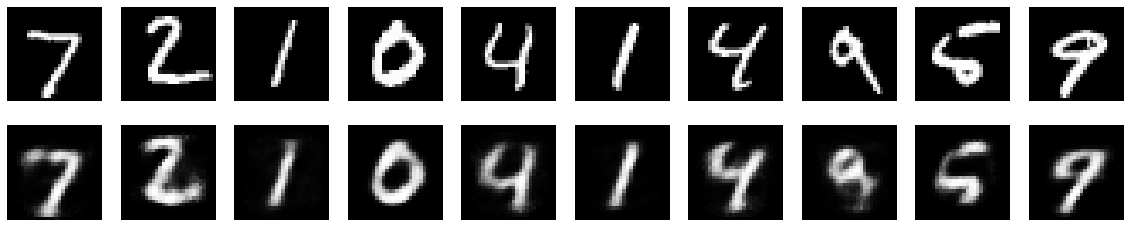

In [10]:
plt.figure(figsize=(20, 4))

n = 10  # no of digits to display

for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.savefig('plot_predict_vs_reconstructed.png')
plt.show()

## Save model

In [11]:
models = {
	'autoencoder': autoencoder,
	'encoder': encoder,
	'decoder': decoder
}

model_save_mult(models)

Saved autoencoder to disk
Saved encoder to disk
Saved decoder to disk


In [12]:
spool = model_summary_spool_mult(models)
print(spool)

## Autoencoder ##
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________
************************************************************

## Encoder ##
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)     

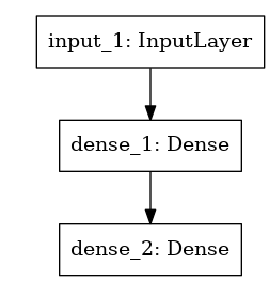

In [13]:
model_plot_save_mult(models)
model_display('autoencoder')

In [14]:
!ls -l

total 504
-rw-r--r-- 1 root root   1426 Jun  7 19:18 autoencoder.json
-rw-r--r-- 1 root root   6849 Jun  7 19:18 autoencoder_plot.png
-rw-r--r-- 1 root root 218832 Jun  7 19:18 autoencoder_weights.h5
drwxr-xr-x 1 root root   4096 May 21 17:02 datalab
-rw-r--r-- 1 root root    896 Jun  7 19:18 decoder.json
-rw-r--r-- 1 root root   4380 Jun  7 19:18 decoder_plot.png
-rw-r--r-- 1 root root 114384 Jun  7 19:18 decoder_weights.h5
-rw-r--r-- 1 root root    893 Jun  7 19:18 encoder.json
-rw-r--r-- 1 root root   4028 Jun  7 19:18 encoder_plot.png
-rw-r--r-- 1 root root 111376 Jun  7 19:18 encoder_weights.h5
-rw-r--r-- 1 root root  21468 Jun  7 19:18 plot_predict_vs_reconstructed.png
-rw-r--r-- 1 root root   2159 Jun  7 19:18 spool_summaries.txt


In [15]:
!zip -r data.zip ./ -x "datalab/*" "\.*"

  adding: encoder_plot.png (deflated 7%)
  adding: encoder_weights.h5 (deflated 16%)
  adding: decoder_weights.h5 (deflated 15%)
  adding: autoencoder_plot.png (deflated 13%)
  adding: decoder_plot.png (deflated 7%)
  adding: plot_predict_vs_reconstructed.png (deflated 15%)
  adding: autoencoder_weights.h5 (deflated 13%)
  adding: spool_summaries.txt (deflated 89%)
  adding: decoder.json (deflated 58%)
  adding: encoder.json (deflated 58%)
  adding: autoencoder.json (deflated 72%)


In [16]:
from google.colab import files
files.download('data.zip')